# Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## package dependencies

In [ ]:
!pip install kaggle

In [2]:
import json

In [3]:
import sys
sys.path.append("/notebooks")

In [4]:
import fastai

- generate api key from kaggle
- replace the kaggle_token with json 

In [5]:
kaggle_token="""
{"username":"npatta01","key":"fdb61255c18946aa1b04763a86f7e7fd"}
"""

save kaggle_token to correct place

In [6]:
!mkdir -p /root/.kaggle/
!echo {json.dumps(kaggle_token)} > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

download the dataset

In [7]:
!kaggle competitions download -c dog-breed-identification

labels.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!ls /root/.kaggle/competitions/dog-breed-identification

labels.csv	sample_submission.csv	   test      tmp    train.zip
labels.csv.zip	sample_submission.csv.zip  test.zip  train


In [9]:
!ls /root/.kaggle/competitions/dog-breed-identification/*.zip

/root/.kaggle/competitions/dog-breed-identification/labels.csv.zip
/root/.kaggle/competitions/dog-breed-identification/sample_submission.csv.zip
/root/.kaggle/competitions/dog-breed-identification/test.zip
/root/.kaggle/competitions/dog-breed-identification/train.zip


In [10]:
PATH = "/root/.kaggle/competitions/dog-breed-identification"

- data has labels, sample submissions, test images, train images

In [11]:
!unzip -o {PATH}/labels.csv.zip -d {PATH}
!unzip -o {PATH}/sample_submission.csv.zip -d {PATH}
!unzip -o {PATH}/test.zip -d {PATH}
!unzip -o {PATH}/train.zip -d {PATH}

Archive:  /root/.kaggle/competitions/dog-breed-identification/labels.csv.zip
  inflating: /root/.kaggle/competitions/dog-breed-identification/labels.csv  
Archive:  /root/.kaggle/competitions/dog-breed-identification/sample_submission.csv.zip
  inflating: /root/.kaggle/competitions/dog-breed-identification/sample_submission.csv  
Archive:  /root/.kaggle/competitions/dog-breed-identification/test.zip
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-id

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0328ce0d5f48e3dbaef86e830e2e9241.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/032b031f2c08f87b76608b2c19851725.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/032b415cb78da68bc4cb6fc86547b310.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/03320bdf508289b449b8cad06fb34bcf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/033410aef5def3da55d9f0057b46d7a2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/03461e6eb363992db018686fc1986452.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0348bdc26f3ddab7bb839fe245f9062f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/034beab81ed7a5806e3324a08b89b60b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/03522703178358081aa1775e69d2b891.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/06965d9a055465dc84fcb6e0b7814ece.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/069895f837ed5098e394b082609e94eb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/069b5a158f61f32d6b43964395beaa49.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/069f97f28c811705453d84528a7af240.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/06a141751c9327ab3afcdea3b0d92968.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/06aed832e3a1e4593a63e3b6490064d9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/06b3a4da7b96404349e51551bf611551.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/06b727fc8e24e46fd7ea78b08091cab5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/06be2fe757a1daa5fbcb51fdf2f5c613.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0a50246e67da6ea8baa16d59a90810e8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0a50874d29b277cc889c0aa1cc8cd03c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0a51fbac72fac75df279e18e4b1c042f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0a54ce47525781f2caa66f65291dddf8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0a59d3205cff15e31ee30213b9988e7e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0a5b12a0f9fe595d6db6ee36b43725df.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0a5f4f224f4660a3453a7fa327bec893.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0a73cae7b4156ca912b24747880aeb65.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0a7c46f223c4a4b7e7a2f25e8e023d73.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0df5d0e873f58e89111b5de3d3fab9d2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0dfae5f3f2489c3eb8fba1a9883a31e3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0e01744db60c4f9933f9a85022b25324.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0e052388023bf1ebe8c0d8679e70b989.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0e0ba1c25d4f30cd8a6b87ecc54f38b6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0e116c1a6ba0c9c4fccac09033d3c393.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0e1ea29028a5b914632b0c30ecf4d3ee.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0e22117d085da91cba31ad4cc3bf0403.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/0e2f282cd63cb0f4798678a2e658e910.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/114cdd56bf41af845a83404b1a57ab82.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/115207097231aeb2bd45ff9a87b97018.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/11536b27e26da85d43fe32f3b5e03d55.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/115e90d8a953820b54e2a63199223b0a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/115e99fcb5d2b82c22d58df7d0011069.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/116880ac65a9eb9e5b4a226d7adc5c6e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1170736b52a554f7bdfb3425d6ce8980.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/11752752be98909829638b08dbc4eb33.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/11754ee6d33fceb7a8dab2c33f3ba008.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1512039a69dd4fd3a0a4a55812f45a1c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/151b1e8efd6f63184058b983e10ff829.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/151f75753aa3c7533bbf9a67af7eab27.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/152352bc0fca6b9a1081aebf0fd49bde.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/152d976d1498996b68a2ad4c1fba695f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1532b029543eac71cc42099d20758c41.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/15394667f518c3a114c389b69afd1e07.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/153c31d4e8da93c86414568a2d6629ce.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/153e0d8f86691d96db98b4c34c0a62b7.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/184edfd87980c0ce7ae78979ff4782b5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/184ef3056eb1222570541d48ecaae387.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/185413ab6114593edb45d02dc64b4334.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/186ac5885342dfa37a76bfa1083798e6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/186ce2324e1dc6ae0f0fe51811a9c2a3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/18774b4bbb8bbb0d3ce71be3df516b76.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1882d50f810a89b34f6c4ff3b8427b00.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/18833355ff91e5a959cb94d026a5ebdf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/188a058f0094aae8244839b543636f83.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1bae0e41174a2ea306752f40386cb492.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1bb0731610f815230a92921263987805.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1bc409ac5789490d4698887b41865c87.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1bc84bac2727d3f657e923df00a7bfef.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1bc97a78125ba2d0e7d6ca5a38dbc961.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1bcb6a6e8735fa2d3de90acb97f2ef17.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1bcd6187ec5390b036b26d7c079d00fd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1bd57f3cd24dfb1ff3301a0effa96b3e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1bd6335be3bc749a6d1a8f7582349ae6.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1edc9d0814654106f79ec57747ada6a3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1edc9e9a84c538b03a4978186265974e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1ee2743cfe8952b63b227f5d3206a0c7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1ee28e7697c7ffaa37ffc463ea7d90ec.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1ee7497ca02744ffbdaac3f446864609.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1eec10718680132a4b6cd1f55126d695.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1ef88d94d19ae42f267d93549f730c6d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1f0215808e10201f4ba417cee4f0ba8d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/1f0d63748605a5e63a9fafaa907392b2.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/22ceeed76fe2f66f8c820cbb24c5d05b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/22dfa94e131e840a76e4961c3455004b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/22e14f4f9a29bd3b6211d1c900d608f8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/22e505cea377535bb668f3f8fa745464.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/22ec59eff108fd9bde99ac72f7bc129c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/22f21f7d5ad5143c3af51710d05efc61.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/22f57f0c7cf7a5dc0c70e6b0077be631.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/22f62d7194a0dd28884d51482c4e4675.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/22f847ce70cd839a1c83b4730958c423.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/26623886ae122bc7f5e181d331e3683f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/266490a2b053a4a3bf68e779f28fb5a9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/266546926d024d240599eda2e6f73c03.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/266d72317675f3fafaf614cd80c04182.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2678d2bec4b7c118ca0fd8d8da70fef4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/26860744a584cc58fe821ea35c61ee50.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/26865eddcab8376dcec5abfff77af0fd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/26887a70fb0aabda9965166eb400876c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2689e13e426db96ba8f0933420be0c44.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2a1f402f44333847e7c03c6d4e1d55af.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2a23d2cc0635ee44798c5a0497927ac6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2a2717a7157cb676f06b684f425f8be4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2a43b986457a491c2efb3a055bb3fa90.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2a4486b119e44642557fb0d64e0f7bae.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2a4eead6f7d016465387f5215ef35ec6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2a4f7dc44fd712af9bebb7ffecf8779a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2a65acdba9ad995ec9ce44a5159b680d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2a6991f5c1a4bb556b6e74d3e941f03b.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2dede0cbedc90b1f8cebd7fa22860536.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2def9da47b9bf0aa4612a58bc4156f21.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2dfc1b6a62d44785a8f88609a23984ff.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2e08d2b5cabc1272c3bbb6c768be1310.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2e0aeaa29b6fe3dcd092c020e6fd45c9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2e0db91413b8aa2a62d93bdc4ae2fc10.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2e12051a710a4610f14b24dc2d41e9e0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2e14a1d3314bdd98aa9c4d43cf3e46bc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/2e14a545f4a0d322203c5ea1bed619ad.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/31ee20c24af937270456165babe0f7c7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/31f345cb82327dbcede32f0171a21996.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/31f5fae9082a63048664ce773a429518.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/31f868787268ceda09c86c50b703220e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/31fa66b4b169fd8947c5b097145859ec.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/31fd0ada33f46691cbc79ca3d4460311.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/31fd12dd573f80fa94f7d8330b57f563.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/32038771425430d6a32f88b08d7eaf56.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3203ed7648f91c3b3f3e8d728de9133f.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/357766e7df11acd84f9fc694ff962195.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3582e90e01db96e7992ea02078e85d1b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/358432ccf7f28d09abb8cb6cffaab9be.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/358806d0ecd9e8209f9fa97e9bc5f620.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3589bfb3936affffd1f24026e2e8b927.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/358b8186b9b1b12df733f787a68da1b6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3591ab50c288dc226cb49fbb991404d6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/35933ae46db73367572fac0a28646c9e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3593a4403b4a2ab9e90382b108cb85e7.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3933dfddcec30cdccbdf10afc4825693.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/39368c6a30781f6b9c50abefed62f1ec.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/394217aa781f327cf4c26beabc50f457.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/39555b7a0c918f7f454678e09b916279.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3959ee88ebaf0f18368c038edbd501cf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3968abbce18a685b3e5089dc6e212f12.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/396ab128eb1fc97113fbd168cb7cec5b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/397660af26be46f24af70061fe504930.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/39846f9458de26be9ba4b6633e4bd047.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3d98ccaa02b0074d95e0502e94bf806c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3db2a3dbf0e6d9829ffe8212629c8693.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3dd26fb7235e28f766e0dc705e7f5b07.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3dd28f8e10a898adef51f60755f87091.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3dde71ab9cc55e7d1a6b07363a398723.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3de98ac5b1344f02756bc3e9b2e90433.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3dec2bdc749cbdb4abbb3be91e145dc6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3dee49a01b8d17df02eac0b35dbf2f8a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/3deef71b0a0b5e8eaf2ccd1a47ca2172.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/42659d711ee7873003d3d13f98a4903b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/426dfd819da9c855bc00123b2cb2aa09.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4270bdd1615b1289dea916d9577451b6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/429003ca7c11f0dca8153c427316baeb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/42975153e2fa61f672eff4c60cfb9616.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4297aaa1b2d927ab2393264cb9742976.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/42a2953db9a2046b4269c35ca5b163d2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/42b26664b0e2b74776aea59c72b96915.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/42bd3b2ac059c8f939e8cd6e3e5e5e4a.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4744f6dcb41662c000619553e0bb2b17.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4745508f54a87b98b11ff7dc1f148ae7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/474742ec061801308d97cdbad4cafbe7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4749fe3c946b813ce12c299eeed888a7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/474a1be9d5932a9e75b28384961ad17f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/475313d23338d7f22f4812c14e3d506f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/475e7b1e2ce7cfed4e84a2466dbfa4f5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4761342af69ec3bf525946e602707a44.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4765abdb079e0952000b75b23095101f.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4ae92c29dd23f08ee3ba8fa41e3539f5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4afd081346193226bab3dc456d80bd3e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4b0ec028345775c33109897160d2e97a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4b15093699eaedb468688caebc3145e2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4b1cb37bfbc83b844ca826fdbdab78d8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4b2467c1983c45f0805f2b7e3d0ffc39.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4b2a7b21a6cbb7c896353a5e30e27f00.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4b3042bb43a898a8d7a02ffd0fbec6f9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4b3451ed3bbffb2430a54ac8cfe551c0.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4edda78c9a49e0e8a866966275178124.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4eddf528862bc0a1e5c0c84d5c25cbcd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4ee390984a81b161806e9a58c923151b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4ef2b99d3028844d067feda58dc5f1f0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4ef61842a22740d920ff041d3271731a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4efacbc76bcd2b3706cc3b908de9ac5b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4efd18204c98543662580a1874f79d31.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4f06a97002f941d3b1b7021636c27222.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/4f0b2dbc23fdef5f939144f456a62140.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/52293d18c28e84739b89c0b94014ee34.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/522b3f3f94bb5deebebe2c43fb2e70c2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/523be80bd62609bb93fda540435134cb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/523e4251a47b4f5fb2ab1416fc5fac1a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/523f4b0f2a009540fe58bc9988a1ca26.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/523f7f65af697d29b9e00f134606ef26.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/52402474e075c1cfe0ced183c2f7f2a7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5240725d0e2ea1e55dc7bcd2aa6eb903.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/525083993cb642b59d1b85d9a1b968c6.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/55e9b799bb1484d9750c918dcec521bb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/55f08cdb3c28528fb54301fa5f51f3b6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/55f0dac253f7acd1387f3359e9696bc7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/55fbea1f92bbc06f3a01d096ed141e6e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5601bb99d64e35d05bb2a37c6b1fc9c3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5617cc7c5d0416aad0cf6b7877ec492e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5622f9116dee11e7e4dbc42fd6192b77.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/562428f4ea8cc7915db94bf187f30b58.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/562a38eb3d7ae1ba14840dc16a574d1a.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/59343f46e1af282747244cb5c9bfe9d6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/59359fdd0967a2b7c0f81156045515cf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/593615f14480143a5a03c7510ff0fd25.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/593a9966e17ee94c46c271c43673dfaf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5940f8f0eab42d8714cf44b4fee6e6bf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/59450165c5fb8bf1a9308a1a3c5699ba.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/595154835588f33db23c38a1185a4a5d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/59552e7263ff462d1695a7ab25cef0dc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/59785c2e118cc2a61627d0cbfaabbf23.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5ce4c34fd033e5c76e36885467206664.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5ce8e4f21b8f73d5c19ab5cbade3d366.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5ceba2fb17843fcc9f6631c95f388ae3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5cf394488058748c8bf816140dd02107.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5cf7053172f3ea2758258fe2c30f2457.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5cf9cca2cc7087d3084f39f8098f2b27.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5d10fc611701eb7d1fb8bf2cf4df7aed.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5d1567d6a675ab863d681141184f8b8f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/5d1a071596c936b29bf3fa514b2b99ff.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/60b14d209fe8ca892fd44efaca76f748.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/60b26c0a1e35e2647439606e614ccab9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/60c04816d01c10d44f04e0415026d885.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/60c14259fb93b76d5c190306837231b1.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/60c1fb271257f3dfacae68b0aa2364e6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/60c23b4e1eb9e703d1952008fd521097.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/60c67b02053ad759bd18612b52211c99.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/60d33c54636163bdba07303d949c79ed.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/60dc0b634487ca5c243799a9673f368e.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/645aca7c4efbd99b685b2b8195b6d3ff.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/645b1ae3c39119fce937e722950b8e2f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/645b23ce69615947501ab57e928da5be.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/645b676a8551f0c9f8982cbc9c253e59.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/645d9cf4b8c341cd96063c2ba73932c5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/64632b3344e54d5fe64be26a4c33c744.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6465d76b2b2ebabd003d7a6e570d2a18.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6466273fcee942fa42c368d0dee9cdbb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/646a3e764aa244f1f160ce3392e0b702.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/685dad19b84125fe1c4713b1616f4a6b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/68656de34ecba9514e27bfa8663ea424.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6866ca62ee065199558343ed8038823d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/68683d69e860726fa2c7dc5c281b7ebf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6869444a8721ee617783d97e7cbd66c1.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/68694781dd4f560e7fd0ce2f8b31230f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/686f2ef992d8a218c7ec4f763b4c67be.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/68772a709a5621a74b38d45158fc6627.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/688747ff7be1fb013f8f01b79b7a0f08.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6bfe766709818c1c62c9ecd8a1ffae9a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6c0b8edb43c00352112f3338df51e039.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6c159ed60d0a8f4bc2cfbff0893a0216.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6c168acd766bea5c3d3f638cb14459e0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6c16f0e1955ccf49ba7ccd7804da15e5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6c1c2a4274bd534d760097e361af970d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6c2ed88e24f9415f17aa0f5de59548a9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6c2f1fb7d7b6b6eb642bf93cda6e128e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6c3c399e0609c579ab08eb3531213688.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6f4614643a12fed5b067173d8d4972fc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6f4d76f5bae03fb94ba9e1d1e10a02f2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6f52e3dcc99528763b386c4b8cfcdc4e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6f5763812fb89bb9cf9ea49f5c59958f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6f5b716569f463d9a0519f3d8ce0d33b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6f610f9257db55dfe8b2364ce9cffd36.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6f685b838df534b65ca28b19ac31bc50.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6f6ec01937566aaa8b7147e0364fa9aa.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/6f7142403a6e6f7a47b763220f883593.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/72e2eea08839bcfee9d01283f4cb9fb9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/72e61ca8aeb851680af7a7fc228de79a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/72ec9ff0338193778ef1760ed3a33789.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/72f5331d6a61869adcc79276711b54b7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/72f755619b096dcc6979feda49714320.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/73025eaafe20e929eaec9217fd92308a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/730261099b89b163e7c9c2cf9b2df619.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/73032fe95faf9bad6bc81663dba0d9b8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/73060e0e9290516d6a41fc4b49392a93.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/75f8a13ae05b56eed204a33bf99287ed.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/75fb6890f3cefa75da91bb921a9877e4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/75ffafddff500cd8e7f0de2e729914bf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7603a1e5ec7825b354d3d9f2dc0f6059.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/76048c1354de715d306ae16b55029a34.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/760c63df844fa16bd2cecb53abf4048e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7611c6281dd2c785743fc0fc47c165fc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7613042504cd73273ab2607cf518ba92.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/76130b7b1eae72e002512087b22cc938.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/79755a72f099c4823258d0387ae22f2e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/797814fc04a3dfb386ea3d15a2305ffe.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7978f93c8a673daf3f99762be9048bb6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/797ccbb502870710af9c4f45c39323b3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7981f73904ad728dc8d5baa5186057ce.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/798219c15b8a5ba54fa5d09772e9e1ea.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/79829c383cbbf0aafafc5baefabd69ea.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7988660897e86b125e37d43919ef9f56.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7990246e6263bf869c52695350617501.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7d63668f8e9b478551d611d731db4e3b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7d638dc5b6c47211168ad1f25c9e96a7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7d670b5cd96a00a1c3f3ebe4565f5fb5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7d6cbeb65a26e2be028542d4e7b8025a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7d7336af21f2de767c3fb8c2fb530e30.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7d77bc154a960b927abd85a56d22616d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7d79bdb0390384196d2eeecc64ac3136.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7d7a8f6e6550d739c02165c563fcc0c7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/7d83a7c369c471d7924f8f35161b7ad5.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/812947176567d407e0af0bfc8e51adbb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/812b49cbbf51b0088b0a0c5b3f87958d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/812c0a953a2c7f83ef54e54aa46fd510.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/81359f8ea755fdc665286850d85f30f5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/814c71217894ef0463e15b307f674cd8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/814dbafbf2adc2f3cb3c57b076945cfd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/814e58d155e941245e2138f647d01d42.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/815019b0e96715cd56bfd244084d7cf2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/81607952d102655b16aaf36ccae74cd4.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8534fce6132c02ccb01f71ff64a80b16.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/85374092bd6893a7eba337013efcbf7c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/853d5c1c46e90c3af12b53f07601e4be.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/853eb43560635069afa5bce9b99da9dc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/85505d3654e57f79c2044bd69fce95bd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/85522f2cb56c9d22a7289726fc74a7d8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8557e50e5f55a41b39e20343581aefeb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/85624000301b28c675b431de0b67a98a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/85650726bd3fc6e3504ea0e7f5de0be2.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/895c941d23392eb5d2d1ba1bca7c945e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/895e8ca65c7bc543e6cb2227e2794a48.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/896a2a4077bd6fb2af6e28b30663e1d1.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/897ad7e9976b014413f7817ea5eadaca.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/897b7ced849fa46bb74125954b425021.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/89838ed67f3fed8e3c66a2d697de47d8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/899205b9082a382bcf11ddffd0799c41.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8993ebe13b8ea8054995518bcd8865db.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8996165efcb69367e5ff2d34578b4528.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8db94c3efe16b1d584ca43c4c8dea3b3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8dbc441067941a2038e016e0ea106541.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8dc7ff54ae077a63cd489faa94684709.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8de006e9f9bacefaef962e7d80203925.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8de2344aa5abe9737fa484afaac5d4c4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8df56bd682bfe7d687a1bda3f6ab854e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8df9fb55617c9eb271087d1eda85a618.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8e0d7d2c224de1d5716d7a69d7854d06.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/8e0e1207d6f244832d7bd02edb2fbf6a.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/91f4724d4014f11174fe29fbac85aa90.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/91faa9c8a54b8d32f34351de3b48c432.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/91faba2e7bd694aec44c6d91e386445b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/91fbe795d1e4dfc30bb003a1411b7e0c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/91fdbcc6640c5c90b1ad7a970edeff7b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/920f67a628490205248d8c9b014d327c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9216c4467e82f86c0c356b08cd46bdb2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/921989c37b9e66a8fd69e45f6de899c0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/921c50882d473211f722be44cf612e3e.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9593687e9915615d54cc1310da3a8f62.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/959454466c795a45b91926d4ddc9fd65.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/959bc1618cb81e9aa244a52db1246076.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/95a57d8230990d5c51818101c1748108.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/95ac26e196cbe5d3391b7cc9f6045ada.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/95b4019505601e5b4f84a1aa7615a268.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/95b89c3204dbb7cf272a7b09330ef87c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/95bd03289e641ad4797a63a6cbc86cfc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/95c0ea9671e68714e9d731a0dacd3fc9.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9948ef8d970738404ae97dec0b4211da.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/994a730fe1c2a1860bf9aff7b8789450.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/995839654892fb3ec7b8d98529bd43ba.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/996254e59f86a920027b43542c177b7d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/996612533635b96b1f1722c8e2ee2b60.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/996c4e810528d940e39f35f0145b75ca.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/996e75ccdd15e67592ea6975b236fa99.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/997078637af920e74676b807734795d7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9977814610777b24db044d8150dcb0e7.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9d4afa72a49b6f9356b0aa25d85a4d0c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9d4d5b37e1be32393d4d36014587d0fd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9d52096062c32db5ad10b3f3620becc4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9d52125fc365894c893af053c569dbb0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9d527d494199fae2aae200f5bf45120e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9d5350d6dddfb91fd8929607358de3a3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9d591f86fdd00f9731dc51d68c7b6323.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9d5bfc96557a8cf257ed5882a9f625be.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/9d6538871f445d81c7cab1d4d7517e66.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a10202b48ff2ee934e458c54a58ecfe2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a1021ebe69e9665e0de523bfef565f4e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a107a7ab791b343799a2f6da2683ec53.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a10932ea361cb1a8a6107e9fc180de48.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a10a8f87a7eeec0b3dd765df1134b23a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a10f9465bba196e25b011b95aea8c68c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a111748da0baecb190cac84b46f1129c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a11d4a8d9cbc1dae233c1673a5dfeb82.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a11f38a3f78dbe56ba0aadad683ddf22.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a5a9337bc668b3812b775adc409571a7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a5aa39411075b2e74379eacf79f64883.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a5aa4e972242a61829ad10b220a12c64.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a5aac0069eb462a90e9caa7e126de80e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a5b2f38489741fdb7bff85cc2b207f90.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a5b9eb4c1bf9fff5267da8fa870f792b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a5c07d274348e4b19b23c5c7a57935e8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a5c1646de93471cbad69c80119572687.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a5c3e70c11086d25ee282749f4045a94.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a947eb2903b97ab8bdaf20ef87c00878.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a9563d34eb190fe60c008fda2a17b236.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a9611f40beffb8864c928953e1ff1024.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a96541cd87b6508da3fa3840f2558fb1.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a965eadb7590983a0a0cd6b9f78ffe54.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a97fbce11cf35df434835888150ceae6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a98a90c1f9333dfc2c63003047a38fa0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a996602e2147a30d8f9eb0dfa536e634.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/a9985684700b03a08b7fa8ed47fcf065.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/acb5cb3c05babcf292778b7312d3d545.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/acc73a21bb371528e6bee04b2a8679e7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/accb3c363dcdbf34778c2e6264e5991f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/acd3e31402414523bde34f253cc03424.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/acdc983dcdf5becaa7d38728b7588dc3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/acec2a69a20d6c9c1be3826c7fafbab5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/acf08bc7be10d9e4260d65f0e5442467.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/acf13dc5a07375b04ef4e8c2b035acc1.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/acf4ca39e3d94f0a6717b6775ab73868.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b06a9fdb4e01719ba007ffb537058a26.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b070bcdd539d9cdf9bdfa006cd6a028a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b0795add22600de65330b537b7709705.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b081d636dd4407059f69622ce2d36362.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b08f3bf4151bb7f3e6c16080b66dea3f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b0904dad8c1223dedfa44c9d9d3b0074.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b090e6fcf24ea6d5b6cdffbd7a9a7cab.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b0997aebb85ed8b6c2e344277a9a1bc4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b0af8261078235519a15edf051e083b3.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b3d75834caa1a3d1078ce03efabdea9a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b3ddcb20a63b9c6a690bc897cddfb515.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b3e52fa19366844b1022f38d78e4f71c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b3f2668daf550e549e583f95119b599e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b3f4e9e6e0440e329bec4355ce7b9016.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b3f90b70c533cfaa5fdb35f646dfe89e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b40e164bd132e333722e5f5e9a25939a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b41241ea71ff8c4718a6db0ee93a450c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b4191e4ce59775f0c40520fb70cb4e55.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b7de3cbbdfa9308091472927e92ab5dd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b7e066098deeee48626a0f8f7492d08c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b7e6c5746e5fc25b72ef66a61bee779a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b7e8ec755947a90b3fa24dbd1666c072.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b7e9b24556a5fd91ff59f0577a56c9a0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b7ebc38ddc4f9dfd1152d92c7b6c7d8f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b7ed359bf1d597b4d253ccec29156b9a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b7eda8c3172b4dc492d75b150b773b1f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/b7f2c17b45e60a1c442f4a722e614542.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bb4296643d280cce44e3915ad7afc178.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bb4697dd8a943efadda0d335082b51e3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bb51cb36913e0695b25838231374fc0d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bb5376b4f82fbe8d96c0a185465bb11d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bb56fa7fbc16268c187d855a44ab9338.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bb589c9bae9914e82d398283e9b151df.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bb5dccafefdac840935697a0f648fd72.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bb5e64bcb0c38e2a1a374d049925eba8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bb6129318013b55d841e729499ba0210.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bf5d40c3f33c4398e9b528d93ac24184.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bf5dc1e307a08b3bb6e766f591da6301.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bf5f881b5ceb71d31d828498cea86818.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bf6271e6ee74ea64502dc3b6c3ca7121.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bf72201525899d708b9858d1bc5fc92b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bf770511ffe516b3daad9ddbc6c1cafa.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bf799d144b2e6fac50d8ef5910b9a95c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bf7d58e28c2a533f66f4c676533c3a05.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/bf8a51b0dfe2239aa3db298602e8c313.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c2c9364fa0fb2347fef08f172bcfecd8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c2cfcfebb375fde437807ded4c172460.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c2d2845260e74a9f4d8d967ea6bb8364.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c2d87315df1b02017edd04f30f8b60fa.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c2e21cbd75e9bf826367b6aced48cf82.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c2e2f40bb342acd55fdfc8c1ffcffe7f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c2f4d8346143083ec1c0a9f4c871d0fb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c2fe25d50856656351b975c1fb3ee6db.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c30c47c0f0f03f5b6e47ecee2feb6eaa.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c6371656002d56de372719eedbf02806.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c64cbe07283cda7eb1446d4c26d3ac87.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c65172e587bf02794e5b40f830bcb2af.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c6544db6441d859fd49ae2db65b66e6e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c656463bfa2068e0b296a327fb0d6081.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c65c06ac8a136ae9480b172e36eebc98.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c65c60d21145dfadffc0ecb9242ffc26.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c65eb89f6d2cfdf88d8c6267d618ec69.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c66730ee3fef77323d4f7e0e69683fef.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c9b4b55951148af15ae4ca46186716f0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c9b5ef4e8ad158bf804452ed2e663374.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c9d0973ef495ae244ccbada81d356bf2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c9e569638f09e27aded2008f15fb9622.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c9e5d4ee92a33a6f36a3f6ffe85b523b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c9e71cac5943e36de66bb2d1ef43fb77.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/c9f781b5b98e347b854fb8cfaf0328d2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ca0094261e3b18eb785c942fe0877e54.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ca0d04d27068409b1c6d5592f21f84bd.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cc26149b884a38865ce31a14334f062e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cc320f0a672ba326071f6958090707ab.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cc334e449673af654c735ec51935f6bc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cc3b7023898a9a305fcd97db7b163b93.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cc41015b99b0cf2974a7ce1f6c11a0ff.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cc4426a161941493d7ba902b73eabf98.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cc51a6a42b0158aea05522577487ae89.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cc5210c9c22b1da58af06874606d3bcc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cc5a5b9075877cdbd4b8466baf984eca.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cff15c13208f1b99912a8a5aa7e4b96f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cff3b5c499c24d2d93074628a3b27362.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cff4e3707c67b197144ab24c9d4287f9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cff62b98a81171ded614fb63519c2447.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/cfff42adc2db5fe6d452d17d13163e87.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d0001158eaa567fc5df05e13f57248f6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d00a7af75fc34b9358fc4d41198305ec.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d00a9cb79ee6edbdb0e683de51a8f50a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d0164a9a6edf0e4810850d39b2455cfe.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d3d32afd69aeb483b554c6298e27ac57.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d3f0056c97074b1579c31ee159eeb77b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d3f35cd21d100eb8c0f84616b3a5476e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d401f036d655c68c0b72762217790db2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d40672ed1475c878954a2778a201e41f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d4084988b2bc28dcc901be3666bee7f5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d42d75931e676fd2076adb4c7089fa5e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d4375afc01dbc1d0737e4b5601ba8297.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d43b95becf6d164c6ee4a2ede286feae.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d8c234e86d3a64fb17905a8b06cca7c3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d8d6cd8825d0222dc74792788619b72e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d8d7a92cef856704822ed7ac7a977472.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d8e27e52408f66ef2c3305ab0e35ffb6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d8e36262aac18be8c6ff387d097d8e2b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d8e39eb35436e6c4e1119cbe377c4371.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d8e7a8dd3d639116edfad1a9d1463130.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d8ec8325742116ccff4fc25add62d003.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/d8eddafe213f5fa44493fb6215d00070.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/dc680dbc1cc98a6e65d784b8cbb6cab1.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/dc6da0379fc0113bab6e75bdcc0f076d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/dc722a27367e371688695f3f106273cf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/dc76656f0a5b1993e15ad18f8a0cedcf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/dc76807cbd38fce48f0fd5000079e4ab.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/dc78472e337f612c787c9fb524ff9f48.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/dc7f80794faf18f0f3b658528a630812.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/dc8156c66d73de9b19f0a3bd640e5f80.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/dc8b5d287285d21a4622efa8c9bee955.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e06ce40d62d3d198f2df70349104a002.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e06fdea86b416e992137ad52bb5da5a8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e07106e5301fbce05cade5c94f775a72.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e073f14cd5f4c1a62cdb0108cca62fdd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e079440ee0061b92ec22faf17be13908.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e07e608afaa89ee4ee939ad0a3bd3224.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e0806e5049519130d459dd7bd640a092.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e089aa32bc96c2a9753e7a5fcdc1bac9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e08d42b2e6f2dbcf24c6bfee8b7d03bd.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e3baf6b2914677edd2729db0f32e2620.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e3c97ed588b32f49c7aae65cf91f17ba.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e3cec8d0c1876ac36942d35f64b9dfa0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e3cfadb2543190f43da6bb5500c75578.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e3d417026b89cbb57b00a7208421009d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e3dd8fc9162f726122ca4cc783114c81.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e3f04efb648b110b2eb04b9c041504d8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e3ff13afe2400a95e3ab76759d94fbc4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e402619cf0a1766811068db0dd42fbae.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e732916519751eaa0cb2ba0cc1217ab9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e7340d1efa70bf6d6c134e1e150f9473.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e73d52671c56e1507fed58c4c287d5f1.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e73dc6a8f2d7c941f28c0a5298bc5bdc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e73efb021b7b49e328b2159d34060b82.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e743bea73da2c0dab99ccdbc697b1ac8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e745d75a74a9cbdc917e7775febd88e8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e751e319cfdc9912ae2e5da2a9b053e0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/e752d87634c6177a748d655a55aeec89.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ea0a254533e645588e739dbdd0e3d3fa.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ea0a6a12e3f6f65e4f742b258a0ffe30.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ea1039f3869357b53abf4ace351218a6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ea111bb38037c9922185a0e9513391d7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ea1993074afd8a51c571bb0f733a754d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ea1e945b924638c2059d7718b522d48f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ea1f200df74cd6c6a458436eedabbc8d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ea23e5341ec5fc3f798ae527a4659d81.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ea280d6cb873df2eb683f0a5f13e3dce.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/edd77b60eb22df1021e726b87c270064.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/edd7c1e04601546fc101901d764dc4b4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/eddf1be0c12c7f3a5029a7787e89476f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ede0dddd46a46f8f6467b7fbd1b4958a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ede33cc93aa6dd4f7bc7fb2436026d08.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ede76874678b483c87bfe1db25f78f9b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/edf164f8974510c5936ee7224f3d7d56.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/edf9eccee2542eb4fdc5757da38f0b46.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/ee0582b96b135f5e036e011d53baa087.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f1c41fe76fb9962343d34c58efb384cd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f1dcabbeb1dbebb326a4b029b6f8b188.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f1e0d9aa421de4c518baddf3d7bea598.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f1eadf24d904d3c1e26d8081555901be.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f1f339f43e83cfb8e4bf76ff5671489c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f1f42942df460f38181e12ebce695b5e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f1fdf296d0252b3dfb46f1bfc37bcb63.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f20017c781603ca2d286361592b12dc4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f202ad1aaf619f90386d96f5b874eeef.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f5a6e430c2c363335d22ae0593d7533a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f5a82b8243ff2845cc9bbe040e70dbf8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f5a862808a7cd1f4a521c34c5b46d189.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f5ae72b9aff8a7671358eb22a54229bc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f5b3e223065e2f8ad10d710f47700ddc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f5b4f0c3ae9b723524e53043025bcd64.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f5b7603797d8a92d5b7b52d073891347.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f5b7912d2f7ab4c4a237ca7008212e7c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f5bdb338a1290c979bb8ff9071c3edd4.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f8c95399f717d2e966a009fa05f7051d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f8cf40ee281034358b8cd947a5e182c0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f8d6584fa27b951bfef528ccf5834ec7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f8d6c0291860bf771941cf2ad458ae2b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f8de6b5fe68dfc6c2b8dd8d6126b20df.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f8e19bd42fded7890ee81454d0a93189.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f8e874d412ff17b33dae7fc7b92f6124.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f8f3aec58161e1911d75543fe802519c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/f8f3c8903f904242b099f1fa4472ff02.jpg  
  inflating: /root/

  inflating: /root/.kaggle/competitions/dog-breed-identification/test/fc7f0d4ae4e277804c859955866c61f4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/fc93fec97f158e4320893cef2a4d9168.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/fc998028e5d109698b507d07c58aa3f4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/fc9f45447f2f2bd82a6072afbddfd78d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/fc9f8662172cd0fd27a6709f93034138.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/fcb000b1746ad358f4d99b55571d7b8e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/fcb43284dd6f9699a7029ef1bf80fd9c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/fcba7f675d9fcacd449174f2229ca33b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/test/fcc295e22d155711de90537e5cde7cee.jpg  
  inflating: /root/

Archive:  /root/.kaggle/competitions/dog-breed-identification/train.zip
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg  
  inflating: /root/.kaggle/competitions/dog-bree

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0326d40cc2b35521f1f3e73cabcf2a23.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/032c14b2df4193004913b01ab48f87c6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0341e3d7a4624d6a7b061fdc25b69044.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0345638400c47bbd920474672562077e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/03564fbb4aba93dd80e5c7cd76f28d28.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/035b459eb52acba2ae75bed041b368fe.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/035f28d8ad34afaf7c8d276d6674bf8f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/035fe39454c2ddb2f6a37146cacf0ac0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0360d42966d191a5db4c4bb2e8c66229.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/06fe22a92fa8dc8f90e7a0f118acad6f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0700d58c82bafe9c4edc81f902178e76.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/07096719a671e1737b829bd1a88f1dbf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0709abee3095717f43db409dd7ce769b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/070e8ff540cc8113939ae5dba4a24f80.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/071652f5f5d0bf00983c075e96ad725f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0718d39d59d9e3b134446440d69b2058.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/07192213791150248bfb5bbe6b0b0373.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0724948de3506f43cda65804efe79b9b.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0ab9cdefc666573f8019356ffefe0c69.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0abdda879bb143b19e3c480279541915.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0ac12e1849fd51b2158d16b8f5e75551.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0ac12f840df2b15d46622e244501a88c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0acfee91dd38e53a20dd1488a17e9af9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0ad3d66ba7b2d5d6d608da088abca7c0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0adfec2804a1efe41f54758cd87cec01.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0afb0d170c66aed12805f838041411ce.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0afc7d87053cb44a529c78c0fac99886.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0ec9be8b32f2b9eff2b817a7f722b118.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0eeb17d40281f3bd639de24ca662c5d2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0ef07f4a6706a04af9ff354e263a28b3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0ef688efcc98bc287976c3d4d8145ae8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0ef80d6c4d739faaae8d3cc08c696c54.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0f015731185a2308c1a85eed4e8ad728.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0f03e05c333f7e5538d4c90f9c837796.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0f04466edd10d6c1d27e123399cf4433.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/0f0effd9b5d25fdab84c2a8ae17d6deb.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/12c9f56e73ac9f4a08afb142f89051ae.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/12d1b8763a1b74c7e40c65b005f91ea9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/12db63491c6590c8ef38dc1824aa4b81.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/12de62fb1fa5a48d596428dd5a90184a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/12dfab0ecfdd9475b561febf2533513a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/12e15979a85e881613f8f2cf49de08be.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/12eb341a614941c33777c708d43a042f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/12f4a7e00a5a4fc215f6e0c3fda079c3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/12fbfefaae57137c745f16b0cf11b84d.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/15d17b41ac5230af8f31417f0a673915.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/15d25fb9d0b922b4943b312509e95c21.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/15d7f26c7d32f81c204936362ead551e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/15e9e5a6a6f3630335261259940114b4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/15f8b879f8660fece35ed760345fa9dd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/160160c8ac562966448486906cb56308.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/16052ac2a6ff7f1fbbc85885d2a7c467.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1609abf6c6ac2e8df0af837cbe9cee74.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/160f87a50f4c3c80752872faa80e4699.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1a0a76e482a7963a008e29977d48aad4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1a0c7c29748d91638f4aa08d00c0294e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1a10e334ddc6c8a2cd20e0e48a9f7ddb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1a1276cf82c2a5dbc9c8d732a795caeb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1a1539a4f40e4417dd88ffee4a255175.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1a15be6688dbe57ebab56b735bbe29f6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1a232b490fde0c962aa1fd7f02175e19.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1a3a594c4fef6d92c9d112a6de31def3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1a3b8d07144c42b337b9ac0c37cdb707.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1d941ae00a3e93cdda72589783a50129.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1d951901580372d429c8c3744e6e094f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1d9607466ffdcc47edf53d377fbbf6d2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1d9d8911b0771e784da6181c3a7fd4c6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1da98c9c285b5a47dac2f31917a24b11.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1db6673169b83ed310c140a7ecea695d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1dba10683484b98ec59cbd5c998a0dad.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1dbb5ed33712d605d15f2a4e5dc855c6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/1dbdfe0bd41b5d1fcceada10ccc8c20d.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/212fac12fe3bfc0820cd6d05339765ab.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/21362f7f3d079a6cbc8b72432fd8b11d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/213bed7c726d8445f06640af7cc45d05.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/213cdae86b93271c566b09bf7bc79e8f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/21532bd1c6dcc80e98eedbbc6cd059a7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2154516e54dc02add050a8a885207d29.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/215de93b31816745d6ceecb1dbe5aea3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/215e7f1b05b7f8ac72bd64618bd3d25e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/215fb2b75397fe9010c35fe84f2a07b2.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/25573fa72e5b0052b27d7165a6da47e5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/256aaa88bc44411757ba3eb431c0db94.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/256b9947f9be5c60b21fa969fa51fe2e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/257589097bbd7ab8901ca6389604e403.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/257d7d5a3b94a225fa26aa537f6aa8d0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2585d3d8b52a90296e9b9917a9bfc81c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/258a8531e8ff16c40d750fa3ae77bd68.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/258b0150db684de6e4f89528fbbd693e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2593df463736b5642ecee1db418d9a44.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/290a83cd8331cfe96a1846f5e1977b55.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/290d1794bc8b2df4911aa5cab3f7a776.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/291508bcd740d30e288da0be54c031da.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2917c652aa90dd5908994b25c10ba674.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2918212b7adcfefa9640c778c21cbf6b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2919fcf3fd82cb677a8cb375acb7898f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/291f8ff3c8a5ad5451f42d6b5119963e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/292027eeb86ebe99f9f00ad02697dcec.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2932b0c7298f1f35288901d9666ba52c.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2d43d94c05bc9f45dec6d50ba85bb880.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2d45a457498cbd8d41954c389a675ce0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2d48dfbeb942e43157564559e4fb3ff6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2d48f1a94c59aef4d9dd0d543d5d9f7b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2d4cc7da80299e9411120acfadb2150e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2d55b4e8bb13c78ade9d76d882825f6c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2d57a95602b1c4eb11f9d47e5760935f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2d5f90898716876858ff1bf7f418d7d7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/2d619ed09dfae38b0f73b5b75d1db784.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3178e11aee69979049dfd339931fe94f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/319d31cd075dbfb583d1d9a804b8bbfd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/319dc76df7443586b9142d51abe74acd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/31a133a9110c151f40464e3e2915030e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/31a289a5fe76268b30549c8477a3cd68.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/31a7e1dd52e2fdef50778e8569788d1d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/31af3732eda329b4d34c91d5a4fc69bf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/31b6ee728915433aad07164838e20a55.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/31ccbbe1496a6d439fd5a403e04e8329.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/35cc113cc5807a081a22317ddc0e6861.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/35d6d29d3db9cb7636ac49f960c3a0c7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/35de6afba5628a315910380be1f74c57.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/35e3f1032d5ae454fc835538f58ba6fd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/35e495b1de348a81e9c64f929de8beff.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/35f3b4e4d718f399667ecc02226cc502.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/35f63ed3f8103464956787f28cd8e74a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/35fbb975be078989d1c17d66ba16b6cb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/360402a4c41e0979e1f6d8b401e676a4.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/396ef6a16b8640e1e5b69f872540776f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3976ced5b536c12b5f9fead049089575.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3983d1f47481aef151cf57b6a7d20760.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3988b5461aeef5f941ec5fb16efdba5c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/398dfd60791dde4f6e638d8a812325dc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3992fe6af13ed5db7e478c6bf95f1fbc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/39936b01d218f295dc596036c94afff9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/399a106d356857c6fe694c8e84a9ed15.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/39ac559ad28d6d469d9fbb6215268727.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3d9ec1670bb28346071283c4d70b4fa5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3da1a4e6e24a1cdc360976fdc5dc6e5b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3dadf4639b5bd63795aeceeddf9a649b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3daf75c1c5cdd5f6c6012c298b3e296f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3db0e7a5251e46b32584100fe3327cd4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3db4ab710ecbc2fb444f083a3d52b3e8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3dc56e4859e15163593dba776fb2b72a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3dcc5ead3d3ba4568c74c0858b8ba818.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/3de22268038ba51622b7ee71acae3c14.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/40ed132135fcf61e1ca97617ad290042.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/40eef5868be3e4acdafa925b41686d47.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/40f12504081ce43152799398e24d3c80.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/40fb9c5e1ffbcd7c3d36afaf4e92525a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/40fc221655af1f9ea340c3105a5a250b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/40fe6e14c7912b1733eecf7d6a667f23.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4106bc7cf624fdd142cbf0000a53640b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/41113b0069d1ed9cb8ee0f5ca4cc6368.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/411f2ae9ea70299b09ec03af2bcc8c04.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/44748d61290af0658e499cc4b046b6c9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4475dfcfe9911f20877bf1946a3bd113.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4478c81c9391174de6acc2afc2af3217.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4479833db2e178449985cacc2aee9596.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/447a24e3766cde62204d42d571212389.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/447dea156cef7c52eac33fce0d01f373.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/447fb3c3e90378c69e71208ff3ce8803.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4489eec52914eeb22028106f61a09fc7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/448a19d0d6e8297339b42a2f51e824b2.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/48a9dcc2e0c6269b089d6b24a66c0143.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/48b3e345543f3c0e79003f87ca1f0518.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/48b7a7cb06dfe7e1b2ee57867b2727c9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/48bdb3561947f1c4b817bdada3db0c0d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/48cc848583416c0bd4019a11b041f2f8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/48d81b479aaf4ccd20be5f7302f27114.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/48dc00c33b5f03e83f391fa306cf6c9e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/48e94004187e7c50552df11bbb475e7f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/48e96993f29d3cea4a33c1a6fadf2bc1.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4c6da6c09d585379ac648979180aec89.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4c7b7de42668d9a5b1dd5ee1f5190c22.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4c852d9cb6f9c33927c5ee3fcac9236b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4c86055d92c8d28f3ae5befc631d5c81.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4c8bb929ad8d021729749ef343251fde.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4c8fce7407df845d94483d89a4fe06f7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4c92d3e3899d68ba9be2165e646f6024.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4ca6732ea8c9a354d28b5e8fc71385e4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/4ca9f95b45b1f51ccb2ce51f0341798c.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/50e9b7412ba4b68a6b44d6b0adeba062.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/50fa5ca96395d9bb39774e48d1153b9a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/50fcbd042ae9a24e3afd5cbb8e1e4542.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/51047d75386a2f715dababba096b364e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/5107853068a2197aacf9313d63cd905f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/511653e56d24079c222b35683d7e6c11.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/5117df3fb07a466715b39c7d50be2267.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/511bfe35ff282294f6129c55bd6c33f6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/511de4a2592207f53c04fdb6277bca20.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/54c60fe48c432816a32b860a32bd9be3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/54d4876e394145a19762cbe38b44b3d4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/54e13fffdce2fc4807122c9b8861bf94.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/54e86ccdccd89c2b15d712c61b9460a9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/54ebe1556b3b40fe66163ed85749782c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/54ece8d1cb7a77b9968d714fba342c36.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/54f2ff40e1d8fda54fe65fef6d1b7046.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/54f801ce3b48bb48b6213d697ad22683.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/54fc3e6172a6202d1c66ccc9ac3d4aff.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/58bc6d2de4433461b9406af472fefca7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/58bd9bfcee7de5692e700b85ec03ec36.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/58ca1366de1592e48fefa05d4c833942.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/58d58b7ce35bfe51429fa6b18fb2d479.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/58d8992675d2ce51851ca6e45b490542.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/58e34ac5f1fb0ed7ede58ff4c2f08b52.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/58e6643e5b5057b65b0f42c6ead8bcc7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/58ed0514ecfd6a7df0cb2711fcbbc81b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/58f7899c5dbbd2dfc0acd6043c972aad.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/5cadfec7e208c688354844dba4befb92.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/5caec584711f18a8bfd66576195b38df.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/5cb6352230645e22549b93cb62a3c28d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/5cb8e8855145375221015c02fe21b273.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/5cba54c8626c411bbc2284058dafe048.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/5cbc1c6e10458a596cba3dad5de44c53.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/5cc00f927f38bcfbda41d1fc4df9b755.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/5ccc97e47bb1878de5b003a86968afe6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/5cccdd466a3a1430668f10ac14fab212.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6083f935fa48fd91a5cf778969006561.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/608daa34284981501bb9ad2443579a21.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/609128c7df2f937179d2c6c3e3e33f5d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6093b245f9b85f0f39f9824cc0279029.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/609a9957fa6e86d7da83deb33e737904.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/60a9aafef2834e389fde21293e41406b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/60c2bb017dc6f7277c9d2f9996cc5ad0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/60e3ba241646a432f7cb58490ee36dbb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/60e3cce8294a0eb07f089e59faa1d15a.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/64b270ba08308fbf74b8a91e256bd666.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/64b92a6c48582314c9bad5454201c402.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/64ca742354bf2d730cd7100653b12bec.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/64d5871c4169a52fcaf945e2aa874bcf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/64d840b8b3948c5ffd8644b1539f5c00.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/64d8c521cda2eeb0362a910c03407bdb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/64dc08b62ca43902fd897d4827f43c26.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/64dd586a1d08937d20618233df2e5dbc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/64e8d146615645ec07587b6cd8f03f32.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/683c074d4fdcbf8a3856fcb3f11de76f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/685b0a223c6ec08677df6800250d8cfd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/685cda6503bd2f2d282d7e9b7ceb33c5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/686096d402dd79581dba8e054df6f2c5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6860f494b5115c719bdf77747b046f18.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/686a10360253c49d8d4ab2c5943234cd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/687e97e0987d363c02984318f9bb72fa.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6887d854847cdc1bbbcc7529c0b93473.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/688b70ee890696dbb745347a8b682ac3.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6c0573fb6ef2b32ee55f8ec30c0d6928.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6c08d6132ebff659700cfc1b1c36cf50.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6c0ce062969a768fd738f265306346ac.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6c1454affc087e6d9d0466f429ae62cc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6c1e8f1f68a9e22c95a1ce59a7fa3fdf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6c2127a71adb12126a3900f00261de41.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6c21947b956d6d17ece6350c96a6bac5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6c22373b6656afe451bf441018342f67.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/6c293c8261201e8b45c3ea35c90eb59d.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/700ef49936ff04f8490ceff02b01127f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7019dc9a063a19bd2f7568f80ede854f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/702067ce3fb87986ac5edb2e3b00ed32.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7023b0cf25567085af701e6cbd3b963a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7035172c071b6774e427e923078549cb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7037652031c91f0b1d77089a1a6f981c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7038b23a52b78ec5e244f024433e6b2f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7043f88b39377d1f4bdf5f4e4dc3f651.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/70462e9512d0b258c1a976a1d523f918.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/74089a7fb8250cf5581ccdc2dbd06876.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7408e8f78e6b1e7372010d145c7f7684.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/741cc81bf0fef902db5bde7e936e946a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/741f874c66239fa37696eb11ce79531e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/742f5ea0773100cbf835fd53b7af71bc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/74326631740d53d3bcdb0e9a9c54fb78.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7453c0ad6556fbbc5443a046855bdd22.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7457e64fb9aa1cc085e95378b076ba23.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/745bba112487c0ba5e0eaecffdadc0f0.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7896a1b868e18ec4b78557bd33d90c40.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/78986ec37ba0465c40dd5ce83faa896d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/78ab8dc71eb167564ee22c326f92831a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/78af4bf2226313d0a098d8889620c19e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/78b7197ade3d5e29873a7ea27adc760c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/78ba53d157186b9c4de0da5d6897a1db.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/78bd37be99859b01540f48a5fd327c0a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/78c79639390eca2e6e34d11278af4190.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/78c7b5a2dd1c9612ae14bf9e326090e6.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7cf1957388808131567bd534b9f44738.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7d0ed77e36fd9b1b4c84f5b07b5290d8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7d128b5bf4a8cc4962ad4265e1213bea.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7d1a2c40bd3d70e59d803c2aad054a09.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7d1b168750bb09cfe75266cbe85c6ea3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7d275bed18ce83cf13a8fcdb9c266d4d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7d30dfde3dc6bc3111c1bfd93f947fad.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7d426866692811f2472124148fe2eb54.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/7d4818d89173768ccccd1fd8fc892d0d.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8141b7ef2da931d7441d3c883ce65b57.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8141c029e973ca29be09417267d1e50b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/814a9fc5db2614bbe59328c16496b50e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/814be837610c46b122ff45f71e97133d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/815079d1d62429b3134f2afa1a53ef65.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/815949fad325d5bd758bd46c2bbccfaf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/815d3c084bcb79bed798a9774d4ce66b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8161ff9d8b2b1b91280f268463c51065.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8165da6ab285d889a8a6f1980aad5869.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/84ab21940432e5b42cfacc58cd84c861.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/84accc2dc9f5bb3ebee89fe1bf23639c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/84adb2cc13b65cf25418cde969b9bb0e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/84b612a8e43c6debbc9951cb24ec9ba0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/84b62d2def32fc85092cabe2c722c135.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/84bcd47e09b0ef3f0b6e3f47f232a77c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/84be9b9f59aa586f1b188781b2c47a3e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/84c6bdd4bb818edd4c088f27312d028f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/84d2dd9eff021b6095a4b1e2ba3c1c0c.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/88c2229b86b2fecb775bd4a6b2c863d4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/88c8698176d181d5c6c7bd7f3acb1736.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/88d6b55d29157070ce6ab55a6040c7b3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/88d848a23380b8a5f0140a47ff514331.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/88dccc33cd5ea95900a170623800ee6d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/88f1fbdc15e7da1c28dfaa6b8cc01ac7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/88f31da888f9a8007165cc1830b63fd7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/88fa6d0c6f8ce60ea125a86b183c5a15.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/88fb448fb7d7fc731a8b2af2884fdbb0.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8c1c53f05c07eb4f67c809855bc44ac9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8c1f3220d32d79207534a062bd04fd85.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8c36d92a7e002977441fbaa2dbfc32bd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8c396c0bdf28e07c823c5fcbb9d6840a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8c3c5a2ab2212dae4745f271854101b9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8c3e7fd14b975242c61afc05228b0e50.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8c547b5df1aff986fa67f9efc97459b9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8c5b6ce48c6129af802c7a2b8c6b6a00.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8c6264cf21c69e5fb58ba291c45e7049.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8fef339017219eb3967f930c062f9dba.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8ff0a26e39535edfde6fb02bdd83e9ad.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/8ff5946c8a2962c47caa9110fe56f91b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9000dac1467ed4a3fff4d7658bbbf3e4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/90109c343f43458deb83972cbd552a0f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9012a23092a021327763c4227cfa2f62.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/901543bd8e1efb32027ccb06378dda4c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/901efa01e94e8601a4a1755a47377748.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/902a7fc56a4422af481df08912a4e62f.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9427f3bf8510ab7da8ee0b7e232b1a05.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/942d5a6f10384d47e38cab1b52bdcd75.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/94350fdc51b84578d0548f0321ac1149.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/94375abe500e8a5797b25db22ec1de06.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/94407c29657a0c84ce6c7176999b63b0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/944776650f21c3fc9cc1410ad6054989.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/94592671cf58b50eb1f8ab70dbebdee3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/945adc048fc9ca656180736fd60cf8d1.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/94620cc5c87cc1c630d9e76391d151c8.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9839d076759d03fb33db62f180efeaa6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/983d4d40106bbaee0404d242221acb6e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/983ea5e5fda9b67b419bd10ab8828835.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/983efc3c13e21aa72a5bf89bf5fbeb99.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/985bbacc9509d794dde32e0619b3264e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/985e9ae5e9382a61fc14d9ed109f2cff.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/986202ae18232b607c3f7a815914e4e7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9862df0bfdc859432fea16cd147ca02e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/98653befb4ff74e23ee1a0a9f2a91df2.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9b5a4262c5417a1b725dc1fb1c97b195.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9b5c596b85007cc6c4d5d4648bb40bdf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9b650543f76bcbdbdfe14118fcc4bc33.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9b68b5724c63b5127703bce31dd1fa65.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9b68e62359ae82765612cc902d7a83d3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9b78211f25e38517e749658e8355c024.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9b7abb2d62395fe947683a33eee54d43.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9ba6ef3e015eb8637565361a6218c65a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9baf45e1dffbf945d7390de180a631da.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9f70486e63ac01868d87763df94226ec.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9f705b2db2425e112e4ceefcbaea7e03.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9f784b4b261cfb7b398126e2077a997b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9f7a6cc0713a2984947db2463b999133.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9f7d5eb41b3bfb57db764b6d6049da3f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9f7d62f1f74eab82149843a32ff8ec9d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9f80e62e65d0cdbde6647f054f12bbef.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9f82e181388d76f44066c05f3bf6c67a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/9f89f0711c1781582859ff9aa3b12906.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a319f3dc68e86ef3d4fb40dcbcc4de99.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a31f36d3aa5d81004b0d454902e40889.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a326caecceeed4705ba786f1d8504430.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a32893132f6fbb3635df77c157c7d8e0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a32faea2f67d4949761454e07437f9ac.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a3396e27b0b6999be8bfff4d094392a8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a33b2afe121439623baa051f2c396c01.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a33c68a84afbc249ab37d98425693d0b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a341328ad1bca600b3a8a0bb0cdde1bc.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a68057c18b0977b5bedacbb3225a15f3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a680e3773b4adc043c95180315e73e94.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a6827689ba680fa5d3ce835f62ed1b04.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a68e6419efb8c5675fead034aadae947.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a694bb8740fe5042c5d1b1a19445a250.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a6951e4f0cff9c000f2f112043abb085.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a69d3f94caab2e0854a7bc80fe7f2a90.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a69dbc3bb27b3b0dd9b74b7f2da13113.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a6abba1d01ba07a581b0e1ae2e17e99e.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a9b4ea005a892de1cddb16e297917426.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a9bcfb541a3436b82ddf3cc9f6f408a5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a9cc695bcbdf1b0ae3784149fcffd8ff.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a9cfa457bbf648e22241dbdee7ba126f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a9ddd222a196bfdf07f52b227b27bf1d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a9e1530fa58de136e797b36bc16514b4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a9f3be811452a710a8c390a9b2590f32.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/a9fafe79f816b5032af49b12fa0cebae.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/aa199e6564bd8d92f50f83275f628389.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/ada32a5a413db0763e807e86562f2695.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/adbc0c1e5c3c13e91701d064239c1eb9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/adc32f768a2cd01a5fcf01bf49fa024a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/adc3d70faa55039ac9fbc49ba68e758a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/adc5daa413e246287aacf9b7f6e16d36.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/add47db070492c3ed9d3b76f1886d684.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/addf2f5e7426173ffb795fa485edae63.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/ade0242e0bfe15d202e398c2380efb3c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/adeb01e891e95b347ea3132451fab8ec.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b1e89362737f51b64095b10b1bae93d2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b1e8dfb27a65a838de14079947684fb8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b1eb6462f0c3801b72d5b0246e9b748e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b1f61f24517fba0fd284ded11f5ea9dd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b1f80a20da3b0bc83d6e5d526592ef92.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b1fcbc9b6ba9c36d53eef5229e54f815.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b1fd800efb2e36febe4ac7df73b07038.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b2004690624be6cb621bd557815e7638.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b200db1a2dc5f3d5a6521aac2130713c.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b5aa440f4f161b2f3b97ec382c68cf4a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b5adc561d92d4804993d0ad88910f2e8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b5adfdc1436b06e71caf363fa8d4d4b9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b5b5058c122d5e340187b6d4ecd8e3b3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b5b618aec816a9dd7d7b9588630fd4e3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b5bc5edb725fa2c3405a5e61b4bd4318.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b5be8566b6f12c926f5bf6d8cfbc67c2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b5bee2902e2e1a80367e023d0d2a43fd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b5c30f3bd5c0335cc02d923c31fb606b.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b925a34373763d846c1438768efec3b5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b941a00fdd9bdab17af68eaf935a1690.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b9442ec825000b9b061cd71ed5eac36a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b94652e2a663106e16ea174e5797b49e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b9469cd11471bab7e748e5fa5bf4f157.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b947c09bf1e90896085a59299eeb8f2f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b9480efcc378fcc84c6e939dbfa59414.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b950f361d3be81bdc9cc509dd059155a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/b957aa0e8dc0628b09708213e9640a2f.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/bd80e8056b70b7af3ae012fafe57d7f4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/bd89c1185696801213b6e641fae6186e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/bd8cb94a46ae36e1bf2f0952a3e4a79e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/bd8ce4891d932fa8762fbfc064129b6c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/bd9334441c2067dfc01dfca5eedf7f21.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/bd93e6dd836bfa50db1bbb071efdd641.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/bd990d4fc279bbfcf6bf8cc832101b39.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/bd9b29f039b5ecf255916a26662070c0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/bd9b41a4737f840a6fe4580dcb6e5aaf.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c099b358d9f75595c1de41b5b27bfd36.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c0a34f1fd1f8ccc767a5fcf9a5763e1d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c0a4e82e33d14987683715ef833e8401.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c0abba0e417be48e778809d94dad57a7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c0b53533209ff39a4620a5959a1c5c98.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c0c3cd7054d43a350f772b8242cd0217.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c0c60bf6e9807b71e15c63309ed58e36.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c0ca40ffa35be4d2772870794fa298cf.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c0d10ee669b1ccc5bc60950efd19cd53.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c44756c419398a3f3a06e814ac73a3bc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c45ca06210977c966dfb8e7fa0cd706d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c45f15470d6627726ecf5f80dc299a76.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c4649d3948446cf3cd90da2ee922b3c1.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c46e2bc23aa32ce2fed1fe08beba88c6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c474bbdf3334f107a1d6ca5c9af86df8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c47bd2467bbecfdd7ebb15abcdd9ba69.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c47eac4ddf7273a67b7b6984052d4303.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c47edf5a8b9abcf72e0579a001b83c1b.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c81748117aecc58678b1677528fdab97.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c81778e436da96e7a89d9ef84b367525.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c825a17e20a29f767bf4b915d036c502.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c829799f837a358ca95191c065d3406b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c83eed4ccffa2bee4dc6098ba09a15e7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c847b641c1424f39725470c28bc93262.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c849f027fa1ae5c4925d24cf50111b1e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c84ec775ef1865e81a7552825982900f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/c85fdb661bce3147ba6560f1f72cbbdd.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cbcd2646088a01dce9e5dbabce5aca3d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cbd3c747a40068089dfd7036ff3c62c0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cbd8e6c8f98e12a8b336ecedfd874707.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cbdc00279f7aa7424d7034ed5463ec79.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cbe1e05f5c6a9cad9e5afa6e86dda4c0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cbe3751367be368a090cb0b160bd7bba.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cbe63371eb2c2c9fb234a64f8bc149a4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cbe74cdfb13fdd3748c52629e38b1588.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cc08970afdec42e3c35ecdcb82b88343.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cfcab9b961c4dca7804e7159d8bd3d60.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cfcc1612346870da991980196d34e106.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cfcc3d9c2e589b87e90a06a3857f955c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cfd115aa91d1b341574869fd5b9a1afd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cfd1cdada50aee75c59957bb8ac00183.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cfd768af4ad2872016ec398f91153fbd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cff9465a6b201d7ba4d83ef0ebab8147.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/cffca67e3dd2a1254c356c55bc84c322.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d003186c0ba9adb9fd4407a2f1eb9510.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d4673be6357164335165192fab6d97e7.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d468a3e96a0a7249a32e614ab7a4d8fa.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d476405a5ee545d4acc5d6840d7b2054.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d47ae5d9f7c17055130be743362f4bfd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d47fb5b7a8097959d87cffa7affad58c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d47fcfb7f8b4de12cb78b54eb1c62dcb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d480f8d24f1479f7669c5def4e3af118.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d48181ff46af9773a0b91dcc67bf701f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d482fb5576279496d6f8d72bf6b93d9f.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d7a98b492b4567df962762fb7ff3cdee.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d7aaddb8f9b021acc82989d6f4144710.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d7b8e8b5851e49502dffc5f9654743be.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d7c47fe9ebf2860b0483d76818c1d000.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d7c69184308bb29224ef9499292abb09.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d7c8a92ed39f40c397ec8fa7ddb3fbe3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d7cee5c0a1a30d94c7bb60b47c699d90.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d7db04ffefefce6e6a1ddedbd350a38f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/d7f3da9914b26cccb9f9e86a977545f5.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/dad80a5e51ac5266dda64b922118e6b4.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/daddd59cf41b76381b8433d6d0f5659b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/dade054c9c79ab86ba523927c89d9858.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/dae1b84026d288c5299d28297814045f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/dae3c0bf3f109087f31b89a7e5328e56.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/daef9ef628860dee42415373fa2357a3.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/daf1dde58cb4cb4d55bf4e4874e76153.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/daf211eab9f3b51eadc03817f41ae9ec.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/daf40879d5b5ac9c66bc6cde2983ab43.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/de477e14f0f55d3b3f591f137d13a698.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/de48dcd04693d44183fcd50cd329d2e5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/de4cf4fcb0bed47267572b694a77060d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/de51f05ddadfb52e97fbc8799891ea8c.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/de578be532caa0a0cfecd1a553b7e373.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/de5e511f50c8e04008da3de616f254fc.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/de8095b35aec0e2a0d07ed11feb11a28.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/de8c32b71a43eef41eb1af93c1baf150.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/de93a60e4b3dd5518460dafda4a1c8b5.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e29768ede01098a68e5021b453a94ee8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e297c765ac7e6c1d7c4657c7e72b1544.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e2ac9b607458c25b1422271887f27e35.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e2b2636c291ebf5649ba403b9592f51e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e2b39eb9cb8b34303cc3527f8f8df9d6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e2bba60478d1600a8b85b768196e7965.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e2bbe6eedea8520efe8c709d091be39a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e2d770fe32772edb9dba937c009f3e4d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e2dd7700aa63c7982130ec9087086bbb.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e5e49ed50cc1f2a58f1fca768a977391.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e5ec89512b1aa4594fffa72867874a27.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e5eed37393749b2aabc60aef5cb0cf27.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e5f1325af86723ad733000ca2adbd226.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e5f1d18d03878ce30dc24eb945652698.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e5f8c5b22071d0a266d80e3f9edc1cd0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e5fb57e9d1239cd72c7855be2947b0c9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e5fe6ce882c440a45354722376fdb770.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e60889840323eb4be2ff9498c79c1409.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e95daa31113477bd93955ae4852dd46a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e960fc18473c0998c1ecbda887aa6bea.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e96a5909f47824c1410fd00e3bc23f4d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e970fc0099be12ed7544a6eee8e3a9db.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e9711a024b141baa00e640231bc461a9.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e97344d98c999f4f9bfa5dc33ca09ecb.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e97b337794ab4b95db5e2622156de547.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e97e598576bbc9adf772f244870d4c7b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/e98505488dfe161e0894e1bce7b5de04.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/ece034fecdb47d3e30115e7b70dd36d1.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/ece252ae0a9e27590c6f30936f4166f6.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/ece3ba1b205d68f8860612f993ade240.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/ece92625596397f614310352584d7b74.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/ece94a0e987ed8316c4b3e4ed9e49477.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/ecec3a80a97ce33d7c6a25c96421a26d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/ecefbe28f3b43d4394e6052802bcd042.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/ecf239b27efded2e309b147ebd5a032d.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/ecf4a6af2c19e363bca3324a99cfecff.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f055e34fcd3c7a941868a371821feb14.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f056299c0c659aa73947f76837369a9f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f056ee6bc913fba2697dabf37c1c8531.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f056f4655ec9b7b942c1fcd6d4ea61f5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f0634d128e68061c0220f224c9ba1228.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f0649324ca9ee431d8c37ef361a0d9fd.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f065f6e63169c7d2ec46174000a2d87e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f069ed4df76d788ff43403f1ba4fa4a8.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f06d9112ed14edb4038daa54f1b1abd5.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f50c3a2915a6744f66237534db3d7779.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f5171a2251d123f01566ace3a1107754.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f523e20f7fac8e1d9909d0956a468467.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f52a0aaff41a517be216bf41c967a751.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f52e47ff39ef157d700d51d62bea79d0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f5373dbe567183432408067cb9dc0957.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f5379f2502e90983e6361d4acdf0a56e.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f547c95af25d09dc444943724396a68a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f550e44352e4eeb99932441678a8af34.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f8169d735ce64c6b8e4c421d61b2d3b5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f817cad476ff2a52fbe5b56a422dd577.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f819a72296da2b1dc4f21d8145c40f27.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f81ec41ce2cc1acb16597fdd231c2406.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f821311972e25d3dc8e8cf76a64e53e1.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f824e27367e8475401b62b24111c467f.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f8271e8e638b9bab6a0d3e164874dd53.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f827aadcd7537def18615dc19f650456.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/f82a2b46267b6d4edc62c76ebdb0fc8b.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fb1f17d411a56a2740310b4c06595877.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fb1ffb75a67173aa922f40c11c40264a.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fb211e01f77eedac02e92d6bfeedb3ab.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fb23c7c26cc49324b9081e2086b32409.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fb2d408bfd49f5a720c3192f7a1cc519.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fb2f2e9ccc7d47d475dcca8666d887f2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fb32a67c8f89942906d08973dbad87b0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fb4dbb9921a74bb2bab11c10a123971b.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fb542f35faf7843778cb2c35d81a7a44.jpg  
  inflatin

  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fe8d52ab96ff238ea7d234b508010ece.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fe9e09be6594f626f0d711bfba10cfe0.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fea60fdd28de5834520134d6dc77a9a2.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/feafd0730eae85e63a41bbc030755c59.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/feb16cf86c9dac6d476e3c372ba5c279.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/feb9d0ae525ca28aabff74b455e34c16.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/febcab8eb2da444bf83336cffec7eb92.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fede60fb2acc02a2da0d0a05f760b7d5.jpg  
  inflating: /root/.kaggle/competitions/dog-breed-identification/train/fee1696ae6725863f84b0da2c05ad892.jpg  
  inflatin

In [12]:
!ls {PATH}

labels.csv	sample_submission.csv	   test      tmp    train.zip
labels.csv.zip	sample_submission.csv.zip  test.zip  train


In [13]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [14]:
PATH = "/root/.kaggle/competitions/dog-breed-identification/"
sz = 224
arch = resnext101_64
bs=16

In [15]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [16]:
!ls {PATH}


labels.csv	sample_submission.csv	   test      tmp    train.zip
labels.csv.zip	sample_submission.csv.zip  test.zip  train


In [17]:
label_df = pd.read_csv(label_csv)
label_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [18]:
label_df.pivot_table(index='breed', aggfunc=len).sort_values('id', ascending=False)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [19]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, 
                       max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', 
                 f'{PATH}labels.csv', test_name='test', 
                 val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)

In [20]:
fn = PATH + data.trn_ds.fnames[0]; fn


'/root/.kaggle/competitions/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'

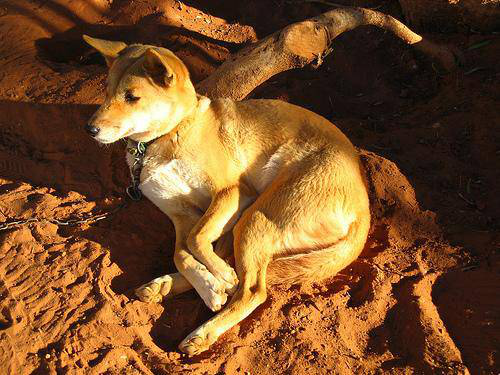

In [21]:
img = PIL.Image.open(fn); img


In [22]:
img.size


(500, 375)

In [23]:
size_d = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}


In [24]:
row_sz, col_sz = list(zip(*size_d.values()))


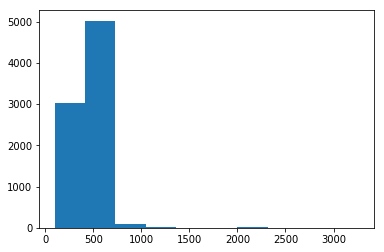

In [25]:
plt.hist(row_sz);


In [26]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on,
                           max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', 
               f'{PATH}labels.csv', test_name='test', num_workers=4,
               val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    return data if sz>300 else data.resize(340, 'tmp')

In [27]:
data = get_data(224, bs)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-2, 5)


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.591182   0.348831   0.89775   
    1      0.408686   0.327547   0.896771                     
    2      0.352928   0.269434   0.921233                     
    3      0.231702   0.325048   0.905577                     
    4      0.223143   0.329527   0.913405                     



[array([0.32953]), 0.9134050880626223]

In [28]:
learn.precompute = False
learn.fit(1e-2, 5, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.262976   0.249328   0.920254  
    1      0.218351   0.245902   0.921722                    
    2      0.274867   0.240762   0.921233                    
    3      0.240107   0.240578   0.929061                    
    4      0.255509   0.25135    0.921233                    



[array([0.25135]), 0.9212328767123288]

In [29]:
learn.save('224_pre')
learn.load('224_pre')

In [ ]:
learn.set_data(get_data(299, bs))


In [ ]:
learn.fit(1e-2, 3, cycle_len=1)


In [ ]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)


In [ ]:
? learn.TTA()

In [36]:
log_preds,_ = learn.TTA(is_test=True)

In [31]:
preds = np.mean(np.exp(log_preds),axis=0)


In [37]:
preds

array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.13998, 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]], dtype=float32)

In [34]:
preds.shape

(10357, 120)

In [40]:
preds

array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.13998, 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]], dtype=float32)

In [56]:
data.test_ds.fnames

['test/de084b830010b6107215fef5d4a75b94.jpg',
 'test/6b423ca7020e70eb05732843c5d2bad1.jpg',
 'test/74aa7e201e0e93e13e87b986a7d31839.jpg',
 'test/a079f72193264bc5685e5d28d7372680.jpg',
 'test/583f7580fa5fec1266331fcf83b76fd6.jpg',
 'test/72cd7496a319c832f670fbb8d349217e.jpg',
 'test/ed9e75a553dbb4712addc1638693dc03.jpg',
 'test/6322fa7edb40af844609b4843a89b5fd.jpg',
 'test/d18de4f66f7d2ae8dffb08ec13b9bbc5.jpg',
 'test/8c567325012bf8d7daeff453ec959312.jpg',
 'test/bbecb2e61f07719abe32be3f36b3fac0.jpg',
 'test/7d3a1066521da895f915af31e8e739df.jpg',
 'test/a0256a9577f2e7c6631dd78556e4bab8.jpg',
 'test/87dafc44ed8ae792ea5c341d7cbb6df4.jpg',
 'test/1f2e9080823a6b093e7a4baa668393d2.jpg',
 'test/c65172e587bf02794e5b40f830bcb2af.jpg',
 'test/4f0b2dbc23fdef5f939144f456a62140.jpg',
 'test/a5049952a1a2ea0473e6520db5e4a4fb.jpg',
 'test/685ac2356ad42163b2141a41972e5c54.jpg',
 'test/bd405393e16688e5282b57d92bdbb97b.jpg',
 'test/cbb4039e5a16f80c02f3d188f98beaf7.jpg',
 'test/18cf06b0c6a59c6891bf6f5a42b

In [43]:
df = pd.DataFrame(preds)
df.columns = data.classes

In [57]:
df.insert(0, 'id' , [o[5:-4] for o in data.test_ds.fnames])

In [58]:
df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,de084b830010b6107215fef5d4a75b94,1.014138e-09,1.471521e-08,6.632545e-10,5.808992e-09,5.411266e-10,2.477793e-10,8.030613e-10,8.258961e-10,1.711759e-10,...,1.176819e-11,2.232125e-10,4.583955e-10,4.966028e-10,5.455786e-09,1.621663e-10,3.042374e-09,5.206686e-09,3.388405e-10,1.797426e-10
1,6b423ca7020e70eb05732843c5d2bad1,5.188426e-07,9.958364e-07,1.044708e-07,3.035727e-06,3.346226e-08,2.576590e-09,1.956810e-08,3.588089e-08,2.475767e-08,...,6.243283e-09,5.344908e-09,4.268552e-09,8.007685e-10,1.939693e-08,2.474593e-08,2.507568e-06,3.436657e-08,1.740128e-06,2.583609e-09
2,74aa7e201e0e93e13e87b986a7d31839,2.205473e-07,6.762749e-08,7.984252e-08,9.300653e-05,7.370983e-06,1.881405e-06,5.219936e-07,2.886602e-07,5.693693e-07,...,5.861447e-07,7.731915e-07,3.063928e-07,3.867465e-07,3.897547e-08,1.335504e-06,1.000912e-06,3.023688e-06,1.399786e-01,1.080957e-07
3,a079f72193264bc5685e5d28d7372680,1.058405e-05,2.553510e-06,9.819344e-07,7.887679e-06,3.678133e-06,1.264856e-07,5.435201e-07,7.842972e-08,6.435137e-07,...,4.730084e-07,1.679890e-06,1.432325e-07,1.287251e-07,5.053490e-07,8.093365e-07,4.192347e-05,1.374487e-07,1.307317e-03,2.989875e-06
4,583f7580fa5fec1266331fcf83b76fd6,8.791211e-08,2.374661e-10,8.741337e-09,1.645445e-09,7.696236e-10,4.750992e-09,4.860440e-11,7.018491e-11,1.009641e-12,...,1.517983e-10,4.252449e-11,2.817379e-10,2.708599e-12,1.325411e-08,1.792976e-09,4.570734e-11,5.064685e-09,4.989785e-09,3.135548e-11


In [59]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM,exist_ok=True)
df.to_csv(f'/notebooks/courses/dl1/custom/subm.gz', compression='gzip',index=False)

In [60]:
!pwd

/notebooks/courses/dl1/custom


In [61]:
FileLink(f'/notebooks/courses/dl1/custom/subm.gz')

/notebooks/courses/dl1/custom/subm.gz

In [62]:
!ls {SUBM}subm.gz

/root/.kaggle/competitions/dog-breed-identification/subm/subm.gz


# Imports

In [ ]:
from fastai.conv_learner import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.dataset import get_cv_idxs
import fastai
import pandas as pd
import fastai.dataset 


# Model Architecture

In [ ]:
sz=224
arch=resnet34
#bs=64
bs=32

# explore dataset

In [ ]:
labels_df = pd.read_csv(f'{PATH}/labels.csv')

In [ ]:
labels_df.head()

In [ ]:
labels_df.pivot_table(index='breed', aggfunc=len).sort_values('id', ascending=False)

In [ ]:
?get_cv_idxs

In [ ]:
label_csv = f'{PATH}/labels.csv'
n = len(list(open(label_csv))) -1
val_idxs = get_cv_idxs(n=n,val_pct=0.2)
n , len(val_idxs)

In [ ]:
def get_data(sz,bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}/labels.csv'
                                        , tfms= tfms, bs=bs
                                        , val_idxs = val_idxs
                                        , suffix =".jpg"
                                        , test_name='test'
                                        )
    return data.resize(sz, 'tmp')


great question.      
Since we have max_zoom=1.1,    
I figured we should ensure our images are at release sz*1.1.     
And I figured resizing them to 340x340 would save plenty of time, and leave plenty of room to experiment.



In [ ]:
data = get_data(sz=sz,bs=bs)

In [ ]:
fn = f"{PATH}/{data.trn_ds.fnames[0]}"
fn


In [ ]:
def display_image_at_idx(idx=0):
    fn = f"{PATH}/{data.trn_ds.fnames[idx]}"
    img = PIL.Image.open(fn) 

    label_idx = data.trn_ds.y[idx]
    class_name = data.classes[label_idx]
    
    print (f"Img is {class_name}")
    
    return img

In [ ]:
!ls {PATH}/tmp

In [ ]:
img = display_image_at_idx(20)
img

In [ ]:
img.size


Lets look at sizes of the images

In [ ]:
size_d = {k: PIL.Image.open(f"{PATH}/{k}").size for k in data.trn_ds.fnames}
row_sz, col_sz = list(zip(*size_d.values()))


In [ ]:
plt.hist(row_sz);

In [ ]:
learn = ConvLearner.pretrained(arch, data , precompute=True, ps=0.5)


In [ ]:
lrf=learn.lr_find()

In [ ]:
learn.sched.plot_lr()

In [ ]:
learn.sched.plot()

In [ ]:
lr=1e-2

In [ ]:
1e-2

In [ ]:
%%time
learn.fit( lrs = lr, n_cycle=5, cycle_len=1)

In [ ]:
learn.precompute=False
learn.fit(lr, 5, cycle_len=1)


In [ ]:
learn.set_data(get_data(299, bs))


In [ ]:
learn.fit(1e-2, 3, cycle_len=1)

In [ ]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

In [ ]:
%%time

learn.unfreeze()
learn.bn_freeze(True)
learn.fit(lrs=[1e-5, 1e-4, 1e-3], n_cycle=1, cycle_len=2)


In [ ]:
learn.set_data(get_data(320, bs))
learn.fit(lrs=[1e-5, 1e-4, 1e-3], n_cycle=1, cycle_len=2)

In [ ]:
?learn.fit

In [ ]:
learn.set_data(get_data(340, bs))
learn.fit(lrs=[1e-5, 1e-4, 1e-3], n_cycle=5, cycle_len=2)

In [ ]:
learn.set_data(get_data(350, bs))
learn.fit(lrs=[1e-5, 1e-4, 1e-3], n_cycle=5, cycle_len=3)

In [ ]:
aa

In [ ]:
learn.sched.plot_lr()


In [ ]:
learn.set_data(get_data(299,bs))
learn.fit(1e-2,3,cycle_len=1)


In [ ]:
learn.fit(1e-2,3 cycle_len=1, cycle_mult=2)

In [ ]:
??tfms_from_model

In [ ]:
%%time 

log_preds, y = learn.TTA()
#metrics.log_loss(y, np.exp(log_preds)), accuracy(log_preds, y)

In [ ]:
(metrics.log_loss(y,preds), accuracy_np(preds,y))


In [ ]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy_np(preds,y))


In [ ]:
log_preds[0].shape

In [ ]:
y.shape

In [ ]:
accuracy(log_preds, y)

In [ ]:
metrics.log_loss(y, np.exp(log_preds))

In [ ]:
data.classes

In [ ]:
data.test_ds.fnames

In [ ]:
log_preds , y = learn.TTA(is_test = True)
probs = np.exp(log_preds)

In [ ]:
probs.shape

In [ ]:
df = pd.DataFrame(probs)
df.columns = data.classes

In [ ]:
df.insert(0, 'id' , [o[5:-4] for o in data.test_ds.fnames])

In [ ]:
df.head()

In [ ]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM,exist_ok=True)
df.to_csv(f'{PATH}subm.gz', compression='gzip',index=False)

In [ ]:
FileLink(f'{SUBM}subm.gz')

In [ ]:
fn = data.val_ds.fnames[0]

In [ ]:
Image.open(PATH+fn).resize((150,150))

In [ ]:
trn_tfms, val_tfms = tfms_from_model(arch,sz)
ds = FilesIndexArrayDataset([fn],np.array([0] ,val_tfms, PATH))

d1 = DataLoader(ds)
preds = learn.predict_d1(d1)

np.argmax(preds)
                            

In [ ]:
im = trn_tfms(Image.open(PATH+fn))
preds = learn.predict_array(im[None])
np.argmax(preds)